In [1]:
## DR ONLY
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import os
import pandas as pd
import glob as glob
import pickle as pickle
ingeo_colours = ["#0077BB","#33BBEE","#009988","#EE7733","#CC3311","#EE3377","#BBBBBB", "#A020F0"]

import numpy as np

In [2]:
from matplotlib.colors import LinearSegmentedColormap

In [3]:
from markov_simulator_dynamic_14March23_Jax_deep import Markov_fit
from markov_simulator_dynamic_14March23_Jax_deep import make_extent


import numpy as np
import matplotlib.pyplot as plt

In [5]:
hypo = pd.read_csv("Figure_2C-G_S2B-H_Modelling_fits/DRandS/Hypothesis.csv")

In [6]:
top = 'T6'

In [7]:
sim = list(hypo.loc[hypo["Topology_number"]==top]['Topology_Name'])[0]
sim

'MEclassic_2'

In [9]:

d = pd.read_csv(glob.glob(os.path.join('Figure_2C-G_S2B-H_Modelling_fits/DRandS/results', sim,'*',"results/residuals.csv"))[0]).sort_values("residual")
d['hyp'] = sim
d = d.reset_index()


In [11]:
# open a file, where you stored the pickled data

path = glob.glob(os.path.join('Figure_2C-G_S2B-H_Modelling_fits/DRandS/results', sim, '*',f'{sim}_fit_full'))
file = open(path[0], 'rb')
# dump information to that file
data = pickle.load(file)

In [12]:
ingeo_colours[2]

'#009988'

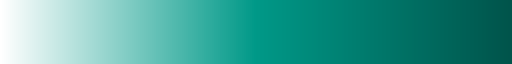

In [13]:
custom_cmap = LinearSegmentedColormap.from_list('custom_colormap', ['#FFFFFF', ingeo_colours[2], '#01544b'])
custom_cmap

In [14]:
data.plot_params["colour_dict"]["A"] = custom_cmap

In [15]:
cmaps = [data.plot_params["colour_dict"][nm] for nm in data.data_names]


In [16]:
k = d.loc[0]['index']
k

527

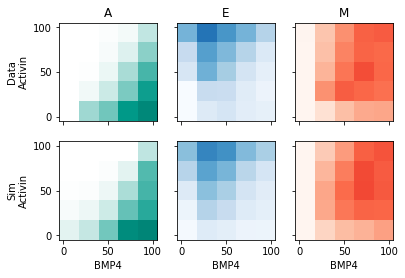

In [17]:
## Plot individual output

a_unique, b_unique = np.unique(data.df["a"].values), np.unique(data.df["b"].values)
extent, aspect = make_extent(a_unique, b_unique, "linear", "linear")
vmax = data.plot_params["vmax"]


k = d.loc[0]['index']
cmaps = [data.plot_params["colour_dict"][nm] for nm in data.data_names]
fig, ax = plt.subplots(2,len(data.data_names),sharex=True,sharey=True)
for i, nm in enumerate(data.data_names):
    ax[1,i].imshow(np.flip(data.proportions_by_data_names[nm][k],axis=0),vmin=0,vmax=vmax,cmap=cmaps[i],aspect=aspect,extent=extent)
    ax[0,i].imshow(np.flip(data.true_final_vals_grid[nm],axis=0),vmin=0,vmax=vmax,cmap=cmaps[i],aspect=aspect,extent=extent)
    ax[0,i].set_title(nm)
ax[0,0].set(ylabel="Data\nActivin")
ax[1,0].set(ylabel="Sim\nActivin")
for axx in ax[1]:
    axx.set(xlabel="BMP4")

#plt.savefig(f"{sim}_{top}_AIC.pdf", dpi=300, transparent=False)

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming data is loaded and the necessary variables are defined already.
a_unique, b_unique = np.unique(data.df["a"].values), np.unique(data.df["b"].values)
extent, aspect = make_extent(a_unique, b_unique, "linear", "linear")
vmax = data.plot_params["vmax"]

k = d.loc[0]['index']
cmaps = [data.plot_params["colour_dict"][nm] for nm in data.data_names]

# Loop through each data name and save both top and bottom heatmaps
for i, nm in enumerate(data.data_names):
    # Create the top heatmap (first subplot)
    fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figsize as needed
    ax.imshow(np.flip(data.true_final_vals_grid[nm], axis=0), vmin=0, vmax=vmax, cmap=cmaps[i], aspect=aspect, extent=extent)
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_xticklabels([])  # Remove x-axis labels
    ax.set_yticklabels([])  # Remove y-axis labels

    # Remove the title for top heatmap
    # ax.set_title(f"Top Heatmap: {nm}", fontsize=10)  # No title

    # Save the top heatmap as PNG with no border and no padding
   # plt.savefig(f"{sim}_{top}_{nm}_top_heatmap.png", dpi=300, transparent=True, bbox_inches='tight', pad_inches=0)
    plt.close(fig)  # Close the top heatmap plot

    # Create the bottom heatmap (second subplot)
    fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figsize as needed
    ax.imshow(np.flip(data.proportions_by_data_names[nm][k], axis=0), vmin=0, vmax=vmax, cmap=cmaps[i], aspect=aspect, extent=extent)
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_xticklabels([])  # Remove x-axis labels
    ax.set_yticklabels([])  # Remove y-axis labels

    # Remove the title for bottom heatmap
    # ax.set_title(f"Bottom Heatmap: {nm}", fontsize=10)  # No title

    # Save the bottom heatmap as PNG with no border and no padding
   # plt.savefig(f"{sim}_{top}_{nm}_bottom_heatmap.png", dpi=300, transparent=True, bbox_inches='tight', pad_inches=0)
    plt.close(fig)  # Close the bottom heatmap plot

In [19]:
## Draw Graph
import networkx as nx
import matplotlib.pyplot as plt

import pandas as pd
ingeo_colours = ["#0077BB","#33BBEE","#009988","#EE7733","#CC3311","#EE3377","#BBBBBB","#5D54A4"]

Hypothesis = pd.read_csv("Figure_2C-G_S2B-H_Modelling_fits/DRandS/Hypothesis.csv")
Hyp_selected = Hypothesis.loc[Hypothesis['Topology_Name']==sim]

In [20]:
wscaler= 4
hscaler= 4

#pos = {'P': (0, 0), 'E': (2/scaler, 0.75/scaler), 'M1': (2/scaler, -0.75/scaler), 'M2': (2/scaler, -0.75/scaler), 'M3': (2/scaler, -0.75/scaler), 'M': (2/scaler, -0.75/scaler), 'A': (2/scaler, 2/scaler), 'ME': (1/scaler, 0), 'X': (2/scaler, -2/scaler)}

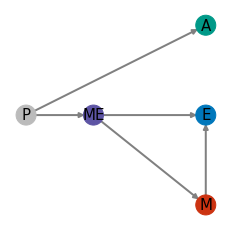

In [21]:
for z in list(Hyp_selected['Topology_Name'].unique()):
    Hyp = Hyp_selected.loc[Hyp_selected['Topology_Name']==z]


    Hyp = Hyp.reset_index()


    connections = Hyp.Transitions[0].split(',')

    G = nx.DiGraph()

    import networkx as nx
    import matplotlib.pyplot as plt

    node_colors = {'P': ingeo_colours[6],
                   'E': ingeo_colours[0],
                   'M': ingeo_colours[4],
                   'M1': ingeo_colours[4],
                   'M2': ingeo_colours[4],
                   'M3': ingeo_colours[4],
                   'A': ingeo_colours[2],
                   'ME': ingeo_colours[7],
                   'ME1': ingeo_colours[7],
                   'ME2': ingeo_colours[7],
                   'X': ingeo_colours[6]}
    
    
    # Add nodes
    nodes = ["P", "ME", "ME1", "ME2", "M", "M1", "M2", "E", "X", "A"]
    G.add_nodes_from(nodes)

    # Define the positions using the spring layout

    #pos = {'P': (0, 0), 'E': (2/wscaler, 0/hscaler), 'M1': (0.75/wscaler, -0.66/hscaler), 'M2': (1.25/wscaler, -1/hscaler), 'M3': (2/wscaler, -1/hscaler), 'M': (2/wscaler, -1/hscaler), 'A': (2/wscaler, 1/hscaler), 'ME': (1/wscaler, -0.25/hscaler), 'ME1': (1/wscaler,-0.375/hscaler), 'ME2': (1/wscaler, 0.375), 'X': (0/wscaler, -1/hscaler)}
    pos = {'P': (0, 0), 'E': (2/wscaler, 0/hscaler), 'M1': (0.75/wscaler, -0.66/hscaler), 'M2': (1.25/wscaler, -1/hscaler), 'M3': (2/wscaler, -1/hscaler), 'M': (2/wscaler, -1/hscaler), 'A': (2/wscaler, 1/hscaler), 'ME': (0.75/wscaler, 0/hscaler), 'ME1': (1/wscaler,-0.375/hscaler), 'ME2': (1/wscaler, 0.375), 'X': (0/wscaler, -1/hscaler)}


    # Create an empty directed graph
    G = nx.DiGraph()

    # Add nodes and edges to the graph
    for connection in connections:
        source, target = connection.split('->')
        G.add_edge(source, target)

    # Draw the graph with specific node colors and thicker edges
    #pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_color=[node_colors.get(node, 'lightblue') for node in G.nodes()], node_size=400)
    nx.draw_networkx_edges(G, pos=pos, width=2, edge_color='gray', arrowstyle='-|>')  # Increase width for thicker edges
    nx.draw_networkx_labels(G, pos=pos, font_size=15)

    # Set the aspect ratio to 'equal' for a square plot
    plt.gca().set_aspect('equal')
    plt.box(False)

    # Display the graph
    name = Hyp['Topology_Name'][0]
   # plt.savefig(f'Graphs/{name}.png')
   # plt.show()


In [22]:
Hyp

,index,Topology_Name,States,Transitions,State_Comp,Data_Comp,Topology_number,Convergence_dir
0,5,MEclassic_2,"P,E,M,A,ME","P->ME,P->A,ME->M,ME->E,M->E","A,E,M","A,E,M",T6,M->E


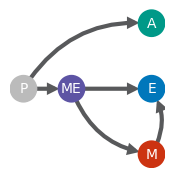

In [23]:
# First, draw the nodes themselves
#pos = nx.spring_layout(G)

plt.figure(figsize=(2,2.1), dpi=100)


nodes = nx.draw_networkx_nodes(
    G,
    pos=pos,
    linewidths=10,
    node_color=[node_colors.get(node, 'lightblue') for node in G.nodes()], node_size=100
    
)

# Draw node labels
node_label_handles = nx.draw_networkx_labels(
    G, 
    pos=pos, font_size=10, font_color="white"
);

# Draw the edges and store the returned FancyArrowPatch list

arrows = nx.draw_networkx_edges(
    G,
    pos=pos,
    arrows=True,
    width=3,
    edge_color="#58595B",
    arrowstyle='-|>'  # I personally think this style scales better
)

weights = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]

connection_styles = ["arc3,rad=-0", "arc3,rad=-0.3","arc3,rad=0.3","arc3,rad=-0","arc3,rad=+0.3","arc3,rad=-0","arc3,rad=-0","arc3,rad=-0.3"]

for a, w, c in zip(arrows, weights, connection_styles):
    
    # mutation_scale affects only the arrowhead size, not the arrow tail.
    # The constants here are arbitrary; you may want/need to change them
    a.set_mutation_scale(10 + w)
    
    # Sharpen arrowheads by creating a mitered joint between arrowhead 
    # line segments, instead of the default joinstyle='round'
    a.set_joinstyle('miter')
    a.set_connectionstyle(c)
    
    # Prevent each arrow tail from jutting forward and through the arrowhead,
    # which happens with the default capstyle='projecting'
    a.set_capstyle('butt')

    plt.gca().set_aspect('auto')
    plt.box(False)

#plt.savefig(f'T6.pdf')



In [24]:
markov_fit = data

In [25]:
params = np.round(markov_fit.sP_opts[k].reshape(5,-1),3)

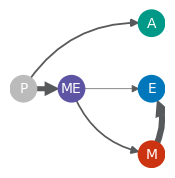

In [26]:
# First, draw the nodes themselves
#pos = nx.spring_layout(G)

plt.figure(figsize=(2,2.1), dpi=100)


nodes = nx.draw_networkx_nodes(
    G,
    pos=pos,
    linewidths=10,
    node_color=[node_colors.get(node, 'lightblue') for node in G.nodes()], node_size=100
    
)

widths = np.abs(params[5,:])*3


# Draw node labels
node_label_handles = nx.draw_networkx_labels(
    G, 
    pos=pos, font_size=10, font_color="white"
);

# Draw the edges and store the returned FancyArrowPatch list

arrows = nx.draw_networkx_edges(
    G,
    pos=pos,
    arrows=True,
    width=widths,
    edge_color="#58595B",
    arrowstyle='-|>'  # I personally think this style scales better
)

weights = [2,2,2,2,2,2]

connection_styles = ["arc3,rad=-0", "arc3,rad=-0.3","arc3,rad=+0.3","arc3,rad=-0","arc3,rad=+0.3","arc3,rad=-0","arc3,rad=-0","arc3,rad=-0.3"]


for a, w, c in zip(arrows, weights, connection_styles):
    
    # mutation_scale affects only the arrowhead size, not the arrow tail.
    # The constants here are arbitrary; you may want/need to change them
    a.set_mutation_scale(10 + w)

    
    # Sharpen arrowheads by creating a mitered joint between arrowhead 
    # line segments, instead of the default joinstyle='round'
    a.set_joinstyle('miter')
    a.set_connectionstyle(c)
    
    # Prevent each arrow tail from jutting forward and through the arrowhead,
    # which happens with the default capstyle='projecting'
    a.set_capstyle('butt')

    plt.gca().set_aspect('auto')
    plt.box(False)

#plt.savefig(f'T6_AMP.pdf')

In [27]:
def sigmoid_signal(a,b,beta0,beta1,beta2,mn,amp):
    exponent = -(beta1*a + beta2*b - beta0)
    exponent = np.clip(exponent,-30,5)
    return np.abs(mn) + np.abs(amp)/(1+np.exp(exponent)+1e-17)


In [28]:
params[:, 0]

Array([ 1.479,  0.202,  0.01 , -0.   ,  1.212], dtype=float64)

In [29]:
a = 0
b = 0
widths = [sigmoid_signal(a, b, *params[:, i]) for i in range(1, params.shape[1])]
widths

[0.01853611962466703,
 0.002730683177108221,
 0.010872608655048924,
 0.7537765403068761]

In [30]:
def compute_results(a, b, params):
    return [sigmoid_signal(a, b, *params[:, i]) for i in range(0, params.shape[1])]

# Define values for a and b
values = [(0, 0), (10, 0), (0, 10), (10, 10), (100, 0), (0, 100), (100, 10), (10, 100), (100, 100)]

# Compute results for each combination of a and b
widths_all = [compute_results(a, b, params) for a, b in values]

In [31]:
compute_results(10, 100, params)

[0.9982153791132005,
 0.4248360421467312,
 0.4079999999999619,
 0.00580316398921269,
 0.10593219077163873]

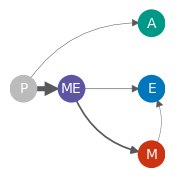

In [32]:
act = 100
bmp = 100

# First, draw the nodes themselves
#pos = nx.spring_layout(G)

plt.figure(figsize=(2,2.1), dpi=100)


nodes = nx.draw_networkx_nodes(
    G,
    pos=pos,
    linewidths=10,
    node_color=[node_colors.get(node, 'lightblue') for node in G.nodes()], node_size=100
    
)

widths = np.abs(compute_results(act, bmp, params))*3


# Draw node labels
node_label_handles = nx.draw_networkx_labels(
    G, 
    pos=pos, font_size=10, font_color="white"
);

# Draw the edges and store the returned FancyArrowPatch list

arrows = nx.draw_networkx_edges(
    G,
    pos=pos,
    arrows=True,
    width=widths,
    edge_color="#58595B",
    arrowstyle='-|>'  # I personally think this style scales better
)

weights = [2,2,2,2,2,2]

connection_styles = ["arc3,rad=-0", "arc3,rad=-0.3","arc3,rad=+0.3","arc3,rad=-0","arc3,rad=+0.3","arc3,rad=-0","arc3,rad=-0","arc3,rad=-0.3"]


for a, w, c in zip(arrows, weights, connection_styles):
    
    # mutation_scale affects only the arrowhead size, not the arrow tail.
    # The constants here are arbitrary; you may want/need to change them
    a.set_mutation_scale(10 + w)

    
    # Sharpen arrowheads by creating a mitered joint between arrowhead 
    # line segments, instead of the default joinstyle='round'
    a.set_joinstyle('miter')
    a.set_connectionstyle(c)
    
    # Prevent each arrow tail from jutting forward and through the arrowhead,
    # which happens with the default capstyle='projecting'
    a.set_capstyle('butt')

    plt.gca().set_aspect('auto')
    plt.box(False)

#plt.savefig(f'T6_a{act}_b{bmp}_AMP.pdf')

In [33]:
# Find the maximum value in the entire array
max_value = max([max(sublist) for sublist in widths_all])

# Scale between 0 and 1
widths_all = [[value / max_value for value in sublist] for sublist in widths_all]
widths_all = [[value*5 for value in sublist] for sublist in widths_all]

In [34]:
widths_all = widths_all*3

In [35]:
params.shape[1]

5

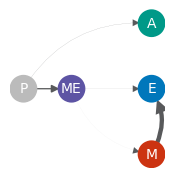

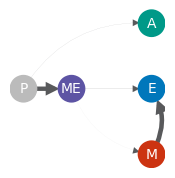

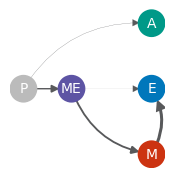

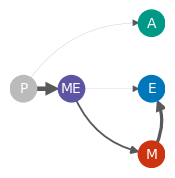

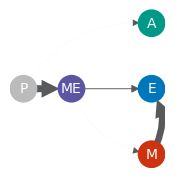

In [36]:
for i in range(0, params.shape[1]):
    # First, draw the nodes themselves
    #pos = nx.spring_layout(G)
    
    plt.figure(figsize=(2,2.1), dpi=100)
    
    
    nodes = nx.draw_networkx_nodes(
        G,
        pos=pos,
        linewidths=10,
        node_color=[node_colors.get(node, 'lightblue') for node in G.nodes()], node_size=100
        
    )
    
    
    # Draw node labels
    node_label_handles = nx.draw_networkx_labels(
        G, 
        pos=pos, font_size=10, font_color="white"
    );
    
    # Draw the edges and store the returned FancyArrowPatch list
    
    arrows = nx.draw_networkx_edges(
        G,
        pos=pos,
        arrows=True,
        width=widths_all[i],
        edge_color="#58595B",
        arrowstyle='-|>'  # I personally think this style scales better
    )
    
    
    connection_styles = ["arc3,rad=-0", "arc3,rad=-0.3","arc3,rad=0.3","arc3,rad=-0","arc3,rad=+0.3","arc3,rad=-0","arc3,rad=-0","arc3,rad=-0.3"]
    
    
    for a, w, c in zip(arrows, weights, connection_styles):
        
        # mutation_scale affects only the arrowhead size, not the arrow tail.
        # The constants here are arbitrary; you may want/need to change them
        a.set_mutation_scale(10 + w)
    
        
        # Sharpen arrowheads by creating a mitered joint between arrowhead 
        # line segments, instead of the default joinstyle='round'
        a.set_joinstyle('miter')
        a.set_connectionstyle(c)
        
        # Prevent each arrow tail from jutting forward and through the arrowhead,
        # which happens with the default capstyle='projecting'
        a.set_capstyle('butt')
    
        plt.gca().set_aspect('auto')
        plt.box(False)
    
#plt.savefig(f'{top}_{i}_AMP.pdf')

In [37]:
chosen_initialisation_index = k
sP = markov_fit.sP_opts[chosen_initialisation_index]

signalling_parameters = sP.reshape(5,-1)
#signalling_parameters = np.zeros((5,_signalling_parameters.shape[1]))
#signalling_parameters[:3] = _signalling_parameters[:3]
#signalling_parameters[4] = _signalling_parameters[3]
mrkvS = markov_fit.mrkvSs[chosen_initialisation_index]
mrkvS.signalling_parameters = signalling_parameters
mrkvS.make_transition_matrices()
mrkvS.make_transition_matrices_dynamic()

mrkvS.simulate()
mrkvS.simulate_dynamic()

s_solve_dynamic = mrkvS.s_solve_dynamic.reshape(mrkvS.s_solve_dynamic.shape[0],mrkvS.D_init.shape[0],-1)
s_solve = mrkvS.s_solve.reshape(mrkvS.s_solve.shape[0],mrkvS.D.shape[0],-1)

total_proportions = {}
for data_name in markov_fit.data_names:
    total_proportions[data_name] = np.zeros_like(mrkvS.final_vals[0])
for state_name in markov_fit.state_names:
    total_proportions[markov_fit.dictionary[state_name]] += mrkvS.final_vals[mrkvS.markov.states.index(state_name)]

total_proportions_dynamic = {}
for data_name in markov_fit.data_names:
    total_proportions_dynamic[data_name] = np.zeros_like(mrkvS.final_vals_dynamic[0])
for state_name in markov_fit.state_names:
    total_proportions_dynamic[markov_fit.dictionary[state_name]] += mrkvS.final_vals_dynamic[
        mrkvS.markov.states.index(state_name)]

cost_dynamic = 0
for key, val in total_proportions_dynamic.items():
    cost_dynamic += (np.abs(val - markov_fit.df_dynamic[key].values / 100) ** 2).sum()
    
print(cost_dynamic)

0.08881756949193646


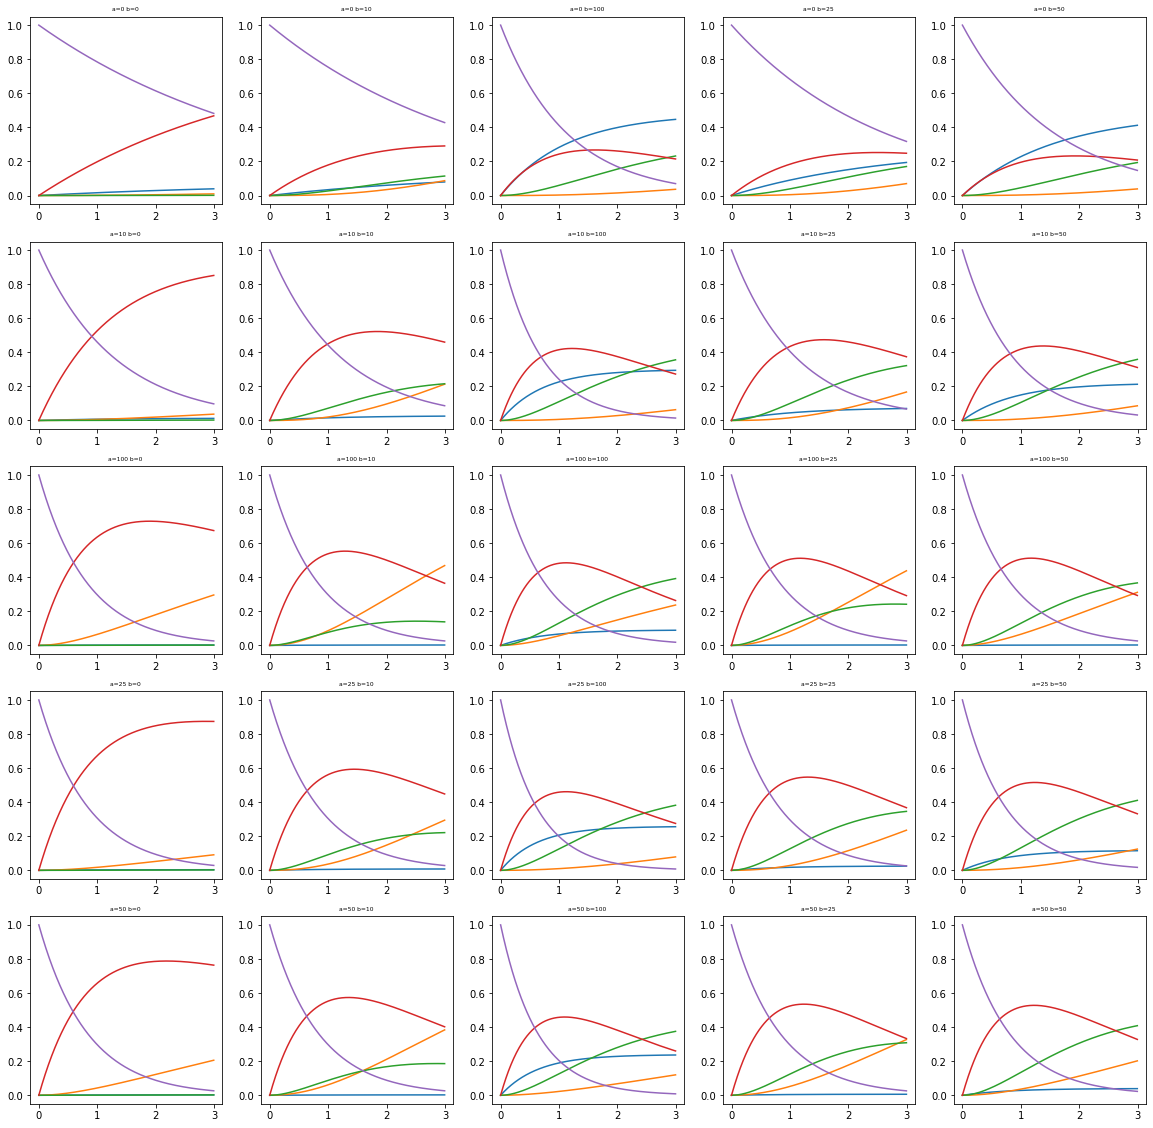

In [38]:
fig, ax = plt.subplots(5,5,figsize=(20,20))
ax = ax.ravel()
for i in range(25):
    for j,nm in enumerate(mrkvS.markov.states):
        ax[i].plot(mrkvS.markov.t_span,s_solve[:,i,j],label=nm)
#         ax[i].legend()
        ax[i].set_title("".join(["%s=%s "%(key,mrkvS.signalling_params[key][i]) for key in ["a","b"]]),fontsize=6)


fig.show()

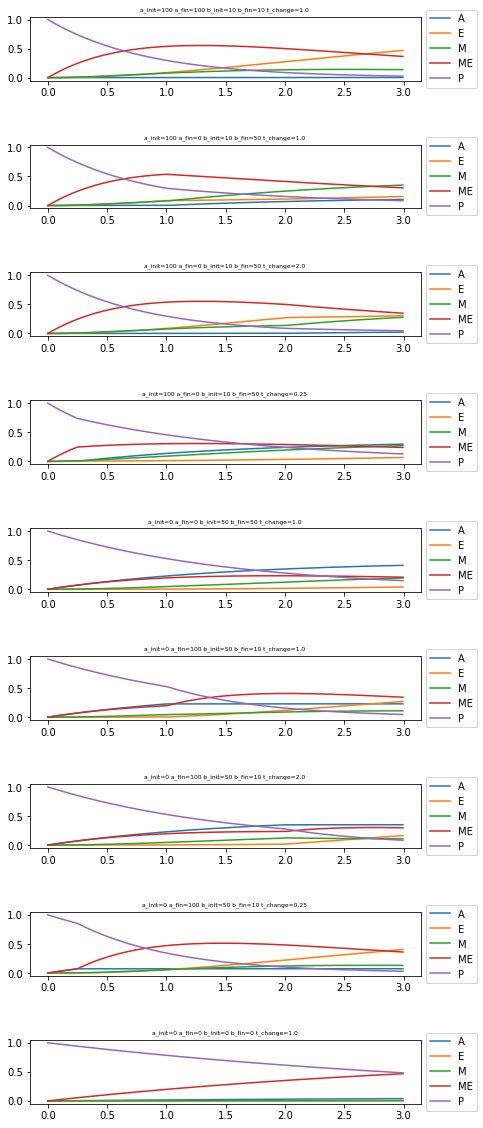

In [39]:
fig, ax = plt.subplots(9,figsize=(7,20))
for i in range(9):
    for j,nm in enumerate(mrkvS.markov.states):
        ax[i].plot(mrkvS.markov.t_span,s_solve_dynamic[:,i,j],label=nm)
#         ax[i].legend()
        box = ax[i].get_position()
        ax[i].set_position([box.x0, box.y0, box.width * 0.8, box.height])

        ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax[i].set_title("".join(["%s=%s "%(key,mrkvS.dynamic_signalling_params[key][i]) for key in ["a_init","a_fin","b_init","b_fin","t_change"]]),fontsize=6)
fig.subplots_adjust(hspace=1)
fig.show()


In [40]:
import matplotlib.pyplot as plt

# Loop over each of the 9 subplots and save them individually
for i in range(9):
    # Create a new figure for each subplot to be saved
    fig, ax = plt.subplots(figsize=(2, 2))
    
    # Plot each state for the current subplot
    for j, nm in enumerate(mrkvS.markov.states):
        ax.plot(mrkvS.markov.t_span, s_solve_dynamic[:, i, j])

    # Set the axis limits for each subplot
    ax.set_xlim([0, 3])  # Set x-axis from 0 to 3
    ax.set_ylim([0, 1])  # Set y-axis from 0 to 1
    
    # Set the ticks for both x and y axes
    ax.set_xticks([0, 1, 2, 3])  # X ticks at 0, 1, 2, 3
    ax.set_yticks([0, 0.5, 1.0])  # Y ticks at 0, 0.5, 1.0

    # Set title with dynamic parameters for each subplot
    ax.set_title("".join([f"{key}={mrkvS.dynamic_signalling_params[key][i]} "
                          for key in ["a_init", "a_fin", "b_init", "b_fin", "t_change"]]), fontsize=6)

    # Save each subplot as a separate PDF
    #plt.savefig(f"subplot_{i+1}.pdf", dpi=300, bbox_inches='tight')  # Save the figure as PDF
    
    # Close the figure to avoid memory overload
    plt.close(fig)




In [41]:
sim_data = pd.DataFrame({'A':s_solve_dynamic[-1,:][:,0]*100,
                   'E':s_solve_dynamic[-1,:][:,1]*100,
                   'M':s_solve_dynamic[-1,:][:,2]*100,
                    'N' :np.sum(s_solve_dynamic[-1,:][:,3:], axis=1)*100,
                    'a_init': list(mrkvS.dynamic_signalling_params['a_init'][:]),
                    'b_init': list(mrkvS.dynamic_signalling_params['b_init'][:]),
                    'a_fin': list(mrkvS.dynamic_signalling_params['a_fin'][:]),
                    'b_fin': list(mrkvS.dynamic_signalling_params['b_fin'][:]),
                    't_change': list(mrkvS.dynamic_signalling_params['t_change'][:])}
                 )

In [42]:
sim_data['t_change'] = sim_data['t_change']*24
sim_data['t_change'] = sim_data['t_change'].astype(int)

sim_data.loc[(sim_data.index==0), 't_change'] = 'S'
sim_data.loc[(sim_data.index==4), 't_change'] = 'S'
sim_data.loc[(sim_data.index==8), 't_change'] = 'U'

sim_data['Condition'] = "A" + sim_data['a_init'].astype(str) + "_" + "B" + sim_data['b_init'].astype(str) +"_"+ sim_data['t_change'].astype(str)

In [44]:
data = pd.read_csv("Figure_2C-G_S2B-H_Modelling_fits/DRandS/data/switching_data.csv")
data['N'] = 100 - (data['M'] + data['A'] + data['E'])

data['t_change'] = data['t_change']*24
data['t_change'] = data['t_change'].astype(int)

data.loc[(data.index==0), 't_change'] = 'S'
data.loc[(data.index==4), 't_change'] = 'S'
data.loc[(data.index==8), 't_change'] = 'U'

data['Condition'] = "A" + data['a_init'].astype(str) + "_" + "B" + data['b_init'].astype(str) +"_"+ data['t_change'].astype(str)

In [45]:
sim_data

,A,E,M,N,a_init,b_init,a_fin,b_fin,t_change,Condition
0,0.234296,46.841417,13.820545,39.103742,100,10,100,10,S,A100_B10_S
1,10.505915,15.549633,35.209195,38.735257,100,10,0,50,24,A100_B10_24
2,2.222665,30.493156,27.774068,39.510110,100,10,0,50,48,A100_B10_48
3,29.567005,6.687599,27.061906,36.683491,100,10,0,50,6,A100_B10_6
4,41.208722,3.877170,19.352988,35.561120,0,50,0,50,S,A0_B50_S
5,22.942863,27.082964,11.015993,38.958180,0,50,100,10,24,A0_B50_24
6,34.920911,16.289038,10.766953,38.023097,0,50,100,10,48,A0_B50_48
7,7.335816,40.501196,13.049206,39.113782,0,50,100,10,6,A0_B50_6
8,3.945210,0.970658,0.113107,94.971025,0,0,0,0,U,A0_B0_U


In [46]:
data

,A,E,M,a_init,a_fin,b_init,b_fin,t_change,N,Condition
0,0.256238,44.800910,11.179288,100,100,10,10,S,43.763563,A100_B10_S
1,13.975649,15.912908,48.486024,100,0,10,50,24,21.625419,A100_B10_24
2,2.039388,24.815995,24.148505,100,0,10,50,48,48.996112,A100_B10_48
3,40.091592,9.272553,34.307675,100,0,10,50,6,16.328180,A100_B10_6
4,44.069056,13.329067,16.664416,0,0,50,50,S,25.937462,A0_B50_S
5,11.253729,21.851543,12.285049,0,100,50,10,24,54.609679,A0_B50_24
6,44.239650,11.076792,10.333040,0,100,50,10,48,34.350518,A0_B50_48
7,0.395296,45.639870,13.590781,0,100,50,10,6,40.374053,A0_B50_6
8,0.358858,0.000000,0.097018,0,0,0,0,U,99.544124,A0_B0_U


In [47]:
## Stacked Barchart

def create_stack_bar_plot(
    df,
    df_error_bar=None,
    x_figSize=2.5,
    y_figSize=2.5,
    y_label=None,
    y_axis_start=0,
    y_axis_limit=None,
    color_pal=sns.color_palette(palette="Blues_r"),
    bar_width=0.8,
    x_label =None
):

    fig, ax = plt.subplots(figsize=(x_figSize, y_figSize))

    sns.set(style="ticks")

    ax = df.plot(
        kind="bar",
        stacked=True,
        color=color_pal,
        width=bar_width,
        ax=ax,
        yerr=df_error_bar,
        capsize=4,
    )
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)

    sns.despine(ax=ax)
    ax.xaxis.set_tick_params(width=1)
    ax.yaxis.set_tick_params(width=1)
    ax.tick_params(axis="both", which="major", pad=1)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.setp(ax.spines.values(), linewidth=1)

    if not y_axis_limit == None:
        ax.set_ylim(top=y_axis_limit)

    handles, labels = ax.get_legend_handles_labels()

    ax.legend(
        reversed(handles), reversed(labels), bbox_to_anchor=(1, 1), loc="upper left"
    )


In [48]:
sim_data

,A,E,M,N,a_init,b_init,a_fin,b_fin,t_change,Condition
0,0.234296,46.841417,13.820545,39.103742,100,10,100,10,S,A100_B10_S
1,10.505915,15.549633,35.209195,38.735257,100,10,0,50,24,A100_B10_24
2,2.222665,30.493156,27.774068,39.510110,100,10,0,50,48,A100_B10_48
3,29.567005,6.687599,27.061906,36.683491,100,10,0,50,6,A100_B10_6
4,41.208722,3.877170,19.352988,35.561120,0,50,0,50,S,A0_B50_S
5,22.942863,27.082964,11.015993,38.958180,0,50,100,10,24,A0_B50_24
6,34.920911,16.289038,10.766953,38.023097,0,50,100,10,48,A0_B50_48
7,7.335816,40.501196,13.049206,39.113782,0,50,100,10,6,A0_B50_6
8,3.945210,0.970658,0.113107,94.971025,0,0,0,0,U,A0_B0_U


Text(0.5, 1.0, 'Activin to BMP4')

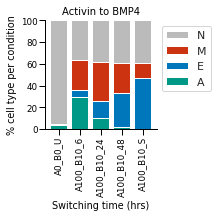

In [49]:
selection = ["A0_B0_U", "A100_B10_6","A100_B10_24","A100_B10_48","A100_B10_S"]

sim_data_sub = sim_data.loc[sim_data['Condition'].isin(selection)]

df = sim_data_sub[["Condition","A","E","M","N"]]

order= selection

df = df.loc[df['Condition'].isin(order)]
df = df.set_index("Condition").loc[order]


df_means = df.groupby("Condition").mean()
df_means = df_means.reset_index()
df_means = df_means.set_index('Condition').loc[order]

with sns.plotting_context("notebook", font_scale=0.8):
    create_stack_bar_plot(
        df_means,
        x_figSize=2,
        y_figSize=2,
        color_pal=[ingeo_colours[2], ingeo_colours[0], ingeo_colours[4], ingeo_colours[6]],
        bar_width=0.8,
        y_label="% cell type per condition",
        x_label="Switching time (hrs)"
    )
    
##Adjustments

plt.ylim(0,100)
    
plt.title( "Activin to BMP4", fontsize=10)
#plt.savefig(f"AtB_SIM_T6_AIC.pdf")

Text(0.5, 1.0, 'Activin to BMP4')

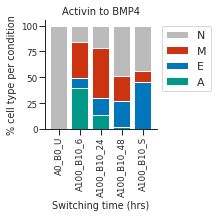

In [50]:
selection = ["A0_B0_U", "A100_B10_6","A100_B10_24","A100_B10_48","A100_B10_S"]

data_sub = data.loc[data['Condition'].isin(selection)]

df = data_sub[["Condition","A","E","M","N"]]

order= selection
df = df.loc[df['Condition'].isin(order)]
df = df.set_index("Condition").loc[order]


df_means = df.groupby("Condition").mean()
df_means = df_means.reset_index()
df_means = df_means.set_index('Condition').loc[order]

with sns.plotting_context("notebook", font_scale=0.8):
    create_stack_bar_plot(
        df_means,
        x_figSize=2,
        y_figSize=2,
        color_pal=[ingeo_colours[2], ingeo_colours[0], ingeo_colours[4], ingeo_colours[6]],
        bar_width=0.8,
        y_label="% cell type per condition",
        x_label="Switching time (hrs)"
    )
    
##Adjustments

    
    
plt.title( "Activin to BMP4", fontsize=10)
#plt.savefig(f"AtB_real.pdf")

Text(0.5, 1.0, 'BMP4 to Activin')

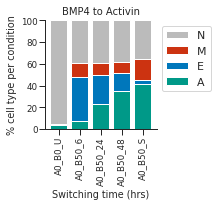

In [51]:
selection = ["A0_B0_U", "A0_B50_6","A0_B50_24","A0_B50_48","A0_B50_S"]

sim_data_sub = sim_data.loc[sim_data['Condition'].isin(selection)]

df = sim_data_sub[["Condition","A","E","M","N"]]

order= selection

df = df.loc[df['Condition'].isin(order)]
df = df.set_index("Condition").loc[order]


df_means = df.groupby("Condition").mean()
df_means = df_means.reset_index()
df_means = df_means.set_index('Condition').loc[order]

with sns.plotting_context("notebook", font_scale=0.8):
    create_stack_bar_plot(
        df_means,
        x_figSize=2,
        y_figSize=2,
        color_pal=[ingeo_colours[2], ingeo_colours[0], ingeo_colours[4], ingeo_colours[6]],
        bar_width=0.8,
        y_label="% cell type per condition",
        x_label="Switching time (hrs)"
    )
    
##Adjustments

plt.ylim(0,100)
    
plt.title( "BMP4 to Activin", fontsize=10)
#plt.savefig(f"BtA_SIM_T6_AIC.pdf")

Text(0.5, 1.0, 'BMP4 to Activin')

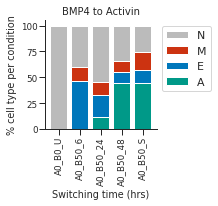

In [52]:
selection = ["A0_B0_U", "A0_B50_6","A0_B50_24","A0_B50_48","A0_B50_S"]

data_sub = data.loc[data['Condition'].isin(selection)]

df = data_sub[["Condition","A","E","M","N"]]

order= selection

df = df.loc[df['Condition'].isin(order)]
df = df.set_index("Condition").loc[order]


df_means = df.groupby("Condition").mean()
df_means = df_means.reset_index()
df_means = df_means.set_index('Condition').loc[order]

with sns.plotting_context("notebook", font_scale=0.8):
    create_stack_bar_plot(
        df_means,
        x_figSize=2,
        y_figSize=2,
        color_pal=[ingeo_colours[2], ingeo_colours[0], ingeo_colours[4], ingeo_colours[6]],
        bar_width=0.8,
        y_label="% cell type per condition",
        x_label="Switching time (hrs)"
    )
    
##Adjustments

    
    
plt.title( "BMP4 to Activin", fontsize=10)
#plt.savefig("BtA_real.pdf")